# 11-Nature Tutorials- Quadratic Hamiltonians and Slater determinants

In [ ]:
#This code is at:
#https://qiskit-community.github.io/qiskit-nature/tutorials/11_quadratic_hamiltonian_and_slater_determinants.html

In [1]:
import numpy as np
from qiskit_nature.second_q.hamiltonians import QuadraticHamiltonian

# create Hamiltonian
hermitian_part = np.array(
    [
        [1.0, 2.0, 0.0, 0.0],
        [2.0, 1.0, 2.0, 0.0],
        [0.0, 2.0, 1.0, 2.0],
        [0.0, 0.0, 2.0, 1.0],
    ]
)
antisymmetric_part = np.array(
    [
        [0.0, 3.0, 0.0, 0.0],
        [-3.0, 0.0, 3.0, 0.0],
        [0.0, -3.0, 0.0, 3.0],
        [0.0, 0.0, -3.0, 0.0],
    ]
)
constant = 4.0

hamiltonian = QuadraticHamiltonian(
    hermitian_part=hermitian_part,
    antisymmetric_part=antisymmetric_part,
    constant=constant,
)

# convert it to a FermionicOp and print it
hamiltonian_ferm = hamiltonian.second_q_op()
print(hamiltonian_ferm)

Fermionic Operator
number spin orbitals=4, number terms=23
  4.0
+ 1.0 * ( +_0 -_0 )
+ 2.0 * ( +_0 -_1 )
+ 2.0 * ( +_1 -_0 )
+ 1.0 * ( +_1 -_1 )
+ 2.0 * ( +_1 -_2 )
+ 2.0 * ( +_2 -_1 )
+ 1.0 * ( +_2 -_2 )
+ 2.0 * ( +_2 -_3 )
+ 2.0 * ( +_3 -_2 )
+ 1.0 * ( +_3 -_3 )
+ 1.5 * ( +_0 +_1 )
+ -1.5 * ( +_1 +_0 )
+ 1.5 * ( +_1 +_2 )
+ -1.5 * ( +_2 +_1 )
+ 1.5 * ( +_2 +_3 )
+ -1.5 * ( +_3 +_2 )
+ -1.5 * ( -_0 -_1 )
+ 1.5 * ( -_1 -_0 )
+ -1.5 * ( -_1 -_2 )
+ 1.5 * ( -_2 -_1 )
+ -1.5 * ( -_2 -_3 )
+ 1.5 * ( -_3 -_2 )


In [2]:
# get the transformation matrix W and orbital energies {epsilon_j}
(
    transformation_matrix,
    orbital_energies,
    transformed_constant,
) = hamiltonian.diagonalizing_bogoliubov_transform()

print(f"Shape of matrix W: {transformation_matrix.shape}")
print(f"Orbital energies: {orbital_energies}")
print(f"Transformed constant: {transformed_constant}")


Shape of matrix W: (4, 8)
Orbital energies: [0.29826763 4.38883678 5.5513683  5.64193745]
Transformed constant: -1.9402050758492795


In [3]:
!pip install pylatexenc

Eigenvalue: 3.909430851761581


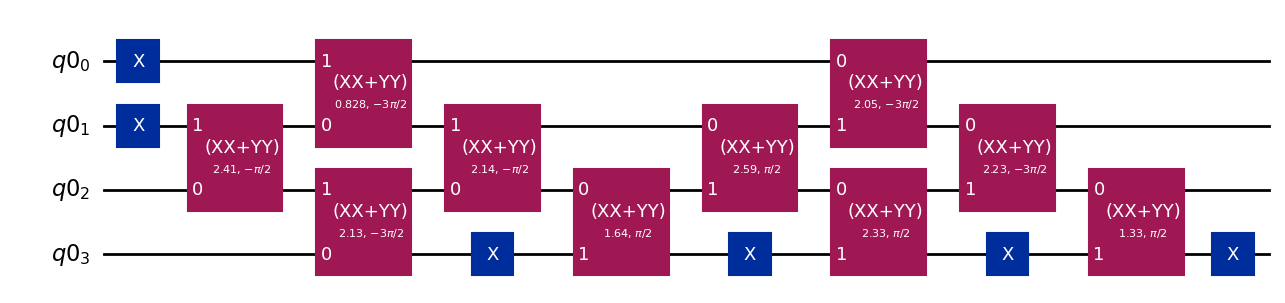

In [4]:
from qiskit_nature.second_q.circuit.library import FermionicGaussianState

occupied_orbitals = (0, 2)
eig = np.sum(orbital_energies[list(occupied_orbitals)]) + transformed_constant
print(f"Eigenvalue: {eig}")

circuit = FermionicGaussianState(transformation_matrix, occupied_orbitals=occupied_orbitals)
circuit.draw("mpl")